Find the markdown blocks that say interaction required! The notebook should take care of the rest!

# Import libs

In [1]:
import sys
import os
sys.path.append('..')
from eflow.foundation import DataPipeline,DataFrameTypes
from eflow.model_analysis import ClassificationAnalysis
from eflow.utils.modeling_utils import optimize_model_grid
from eflow.utils.eflow_utils import get_type_holder_from_pipeline, remove_unconnected_pipeline_segments
from eflow.utils.pandas_utils import data_types_table
from eflow.utils.sys_utils import get_all_directories_from_path
from eflow.utils.sys_utils import load_pickle_object

import pandas as pd
import numpy as np
import scikitplot as skplt
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import SCORERS
import copy
import pickle
from IPython.display import clear_output

In [2]:
# # Additional add ons
# !pip install pandasgui
# !pip install pivottablejs
# clear_output()

In [3]:
%matplotlib notebook
%matplotlib inline

## Declare Project Variables

### Interaction required

In [4]:
dataset_path = "Datasets/titanic_train.csv"

# -----
dataset_name = "Titanic Data"
pipeline_name = "Titanic Pipeline"

# -----


# -----
notebook_mode = True

## Clean out segment space

In [5]:
remove_unconnected_pipeline_segments()

# Import dataset

In [6]:
df = pd.read_csv(dataset_path)
shape_df = pd.DataFrame.from_dict({'Rows': [df.shape[0]],
                                   'Columns': [df.shape[1]]})
display(shape_df)
display(df.head(30))

,Rows,Columns
0,891,12


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [7]:
data_types_table(df)

,Data Types
Features,
Age,float64
Fare,float64
PassengerId,int64
Survived,int64
Pclass,int64
SibSp,int64
Parch,int64
Name,object
Sex,object


# Loading and init df_features

In [8]:
# Option: 1
# df_features = get_type_holder_from_pipeline(pipeline_name)

In [9]:
# Option: 2
df_features = DataFrameTypes()
df_features.init_on_json_file(os.getcwd() + f"/eflow Data/{dataset_name}/df_features.json")

In [10]:
df_features.display_features(display_dataframes=True,
                             notebook_mode=notebook_mode)

,Data Types
Features,
Cabin,string
Embarked,string
Sex,string
Survived,bool
Parch,integer
SibSp,integer
Fare,float
Age,float
Pclass,category


# Any extra processing before eflow DataPipeline

# Setup pipeline structure

### Interaction Required

In [11]:
main_pipe = DataPipeline(pipeline_name,
                         df,
                         df_features)

The file 'root_pipeline.json' exist!
Now configuring object with proper pipeline segments...
Removing the feature: "PassengerId"
Removing the feature: "Ticket"
Removing the feature: "Name"


In [12]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,NaN,S
887,1,1,female,19.0,0,0,30.0000,B42,S
888,0,3,female,NaN,1,2,23.4500,NaN,S
889,1,1,male,26.0,0,0,30.0000,C148,C


In [13]:
main_pipe.perform_pipeline(df,
                           df_features)

Ignore feature:  Parch


In [14]:
df

,Survived,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Embarked_Cherbourg,Embarked_Queenstown,Embarked_Southampton
0,0,22.0,1,0,7.2500,False,True,False,False,True,False,False,True
1,1,38.0,1,0,71.2833,True,False,True,False,False,True,False,False
2,1,26.0,0,0,7.9250,True,False,False,False,True,False,False,True
3,1,35.0,1,0,53.1000,True,False,True,False,False,False,False,True
4,0,35.0,0,0,8.0500,False,True,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,27.0,0,0,13.0000,False,True,False,True,False,False,False,True
887,1,19.0,0,0,30.0000,True,False,True,False,False,False,False,True
888,0,28.0,1,2,23.4500,True,False,False,False,True,False,False,True
889,1,26.0,0,0,30.0000,False,True,True,False,False,True,False,False


# Seperate out data into train and test sets

In [15]:
X = df.drop(columns=df_features.target_feature()).values
y = df[df_features.target_feature()].values

In [16]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=517, stratify=y,
)
del X
del y

In [17]:
feature_order = list(df.columns)

In [18]:
del df

In [19]:
# n_estimators=100, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None

# Fit Models and view results

In [20]:
# # Find best parameters for model
# param_grid = {
#     "n_estimators": np.arange(100, 500, 50),
#     "criterion": ["entropy", "gini"],
#     "max_depth": [4,5,6,7,]
# }

# model, best_params = optimize_model_grid(
#     model=RandomForestClassifier(),
#     X_train=X_train,
#     y_train=y_train,
#     param_grid=param_grid,
#     scoring="f1_micro"
# )

Tuned Parameters: {'criterion': 'entropy', 'max_depth': 7, 'n_estimators': 100}
Best score on trained data was 0.821845


In [ ]:
# model = load_pickle_object("/Users/ericcacciavillani/Desktop/Coding/Python_Files/Artificial_Intelligence/Data Mining/eFlow/testing/eflow Data/Titanic Data/Classification Analysis/Target Feature: Survived/RandomForestClassifier/RandomForestClassifier.pkl")

In [22]:
model_name = repr(model).split("(")[0]
model_name

'RandomForestClassifier'

In [23]:
model_analysis = ClassificationAnalysis(dataset_name=dataset_name,
                                        model=model,
                                        model_name=model_name,
                                        feature_order=feature_order,
                                        target_feature=df_features.target_feature(),
                                        pred_funcs_dict={"Probabilities function":model.predict_proba,
                                                         "Predict function":model.predict},
                                        sample_data=X_train[0],
                                        notebook_mode=notebook_mode,
                                        df_features=df_features)



------------------------------Train Data------------------------------
Now running classification on Probabilities function on thresholds:
	Target Value:0: Prediction weight: 0.12
	Target Value:1: Prediction weight: 0.04

Shape of the data is (623, 12)


,Metric Scores
Precision(micro),0.8957
Precision(macro),0.9060
Precision(weighted),0.8993
MCC,0.7797
Recall(micro),0.8957
Recall(macro),0.8743
Recall(weighted),0.8957
F1-Score(micro),0.8957
F1-Score(macro),0.8857
F1-Score(weighted),0.8936


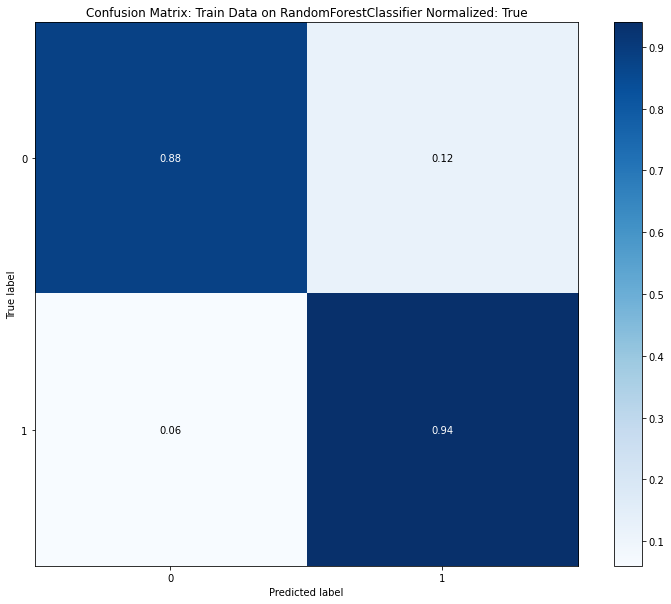

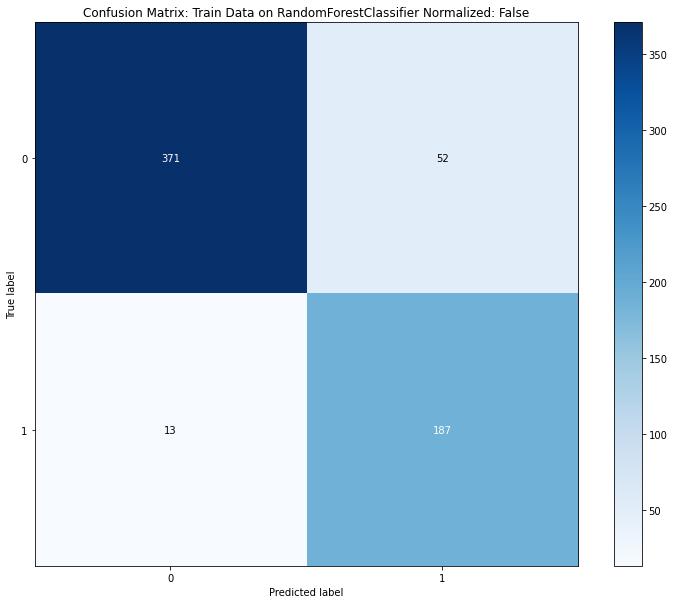

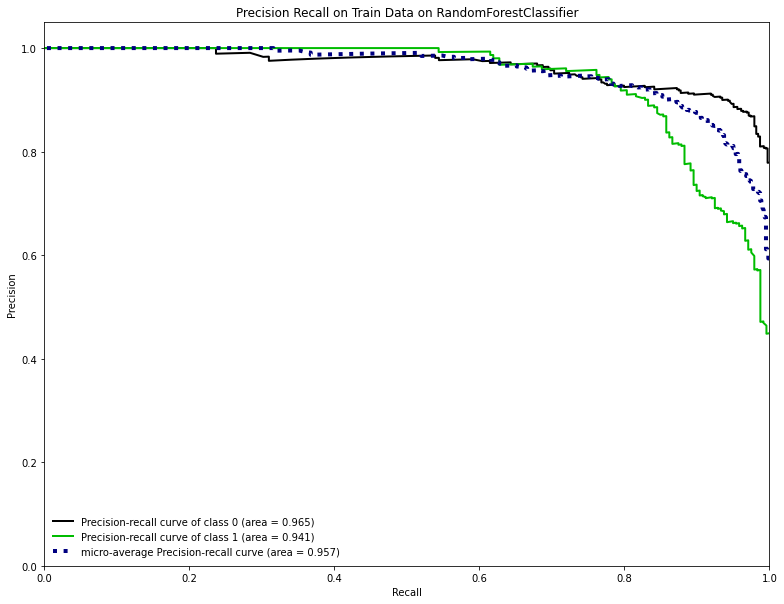

/Users/ericcacciavillani/anaconda3/envs/eflow/lib/python3.8/site-packages/scikitplot/metrics.py:443: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr_dict[i], tpr_dict[i])


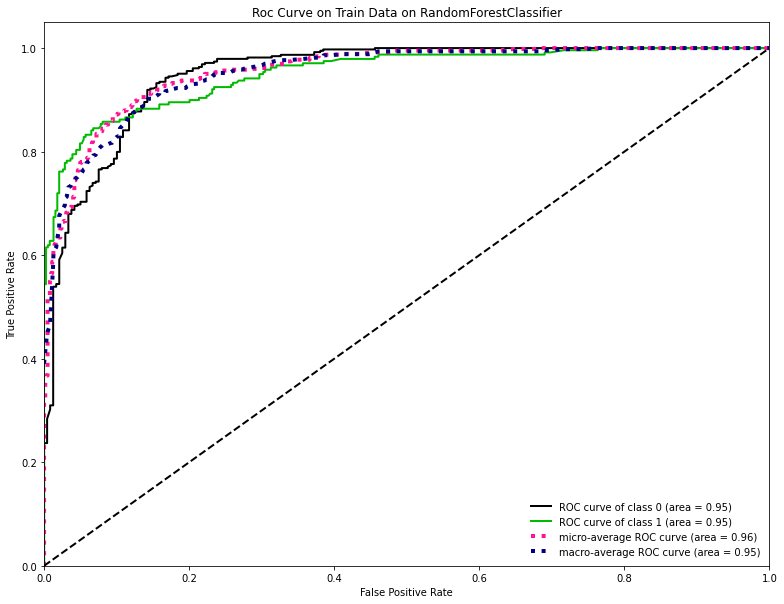

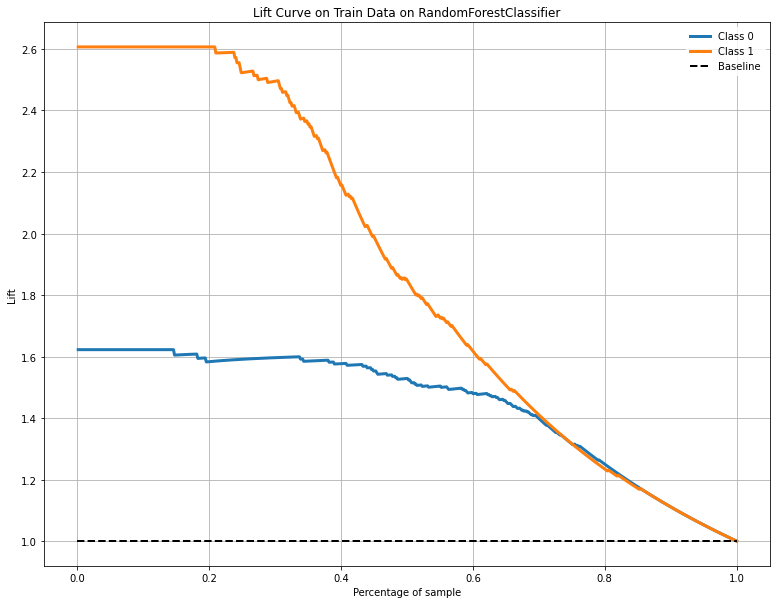

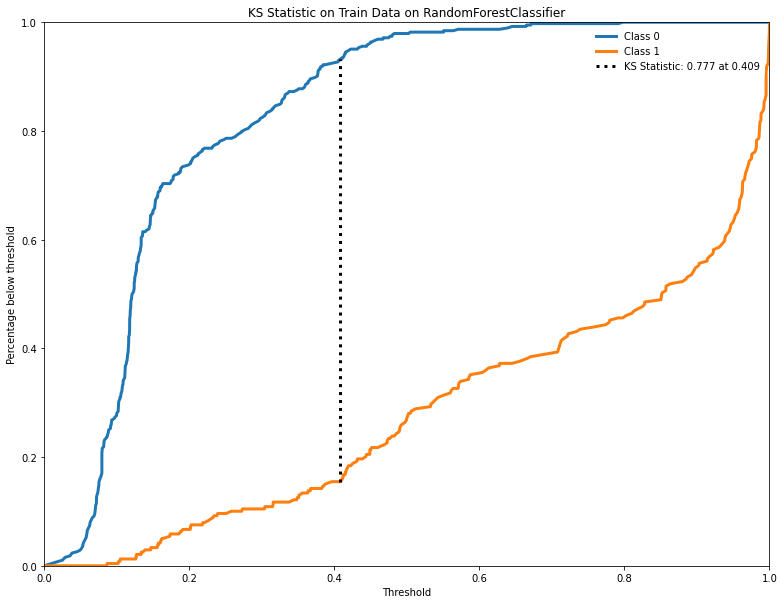

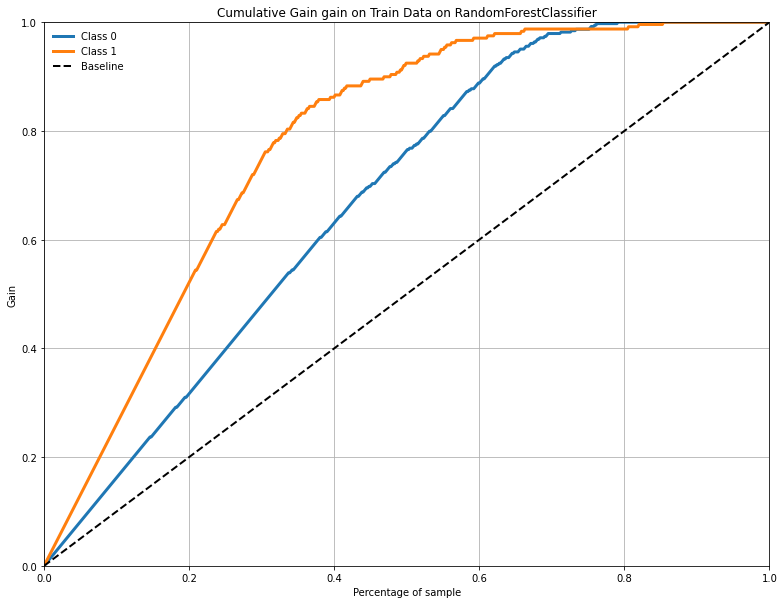



**********Generating graphs for when the model predicted incorrectly**********



../eflow/model_analysis/classification_analysis.py:1428: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tmp_df = copy.deepcopy(error_df[error_df[
../eflow/model_analysis/classification_analysis.py:1428: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tmp_df = copy.deepcopy(error_df[error_df[




**********Generating graphs for when the model predicted correctly**********

----------------------------------------------------------------------

Now running classification on Probabilities function on no thresholds.

Shape of the data is (623, 12)


,Metric Scores
Precision(micro),0.8844
Precision(macro),0.9054
Precision(weighted),0.8936
MCC,0.7595
Recall(micro),0.8844
Recall(macro),0.8557
Recall(weighted),0.8844
F1-Score(micro),0.8844
F1-Score(macro),0.8710
F1-Score(weighted),0.8807


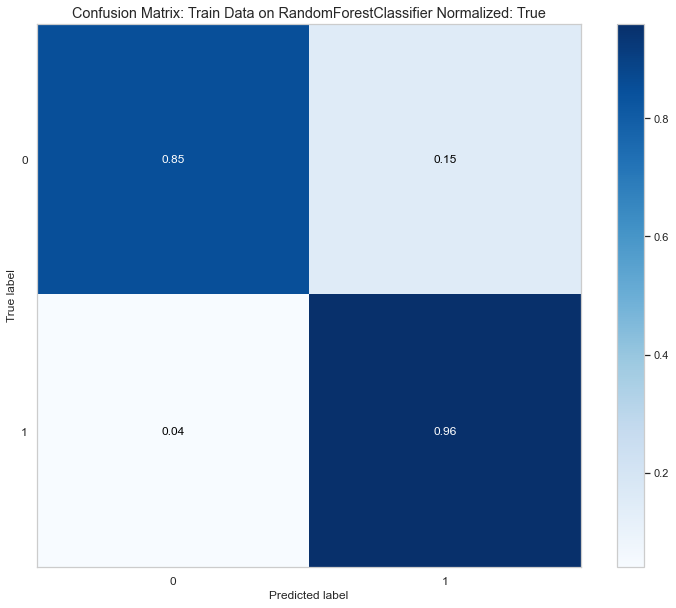

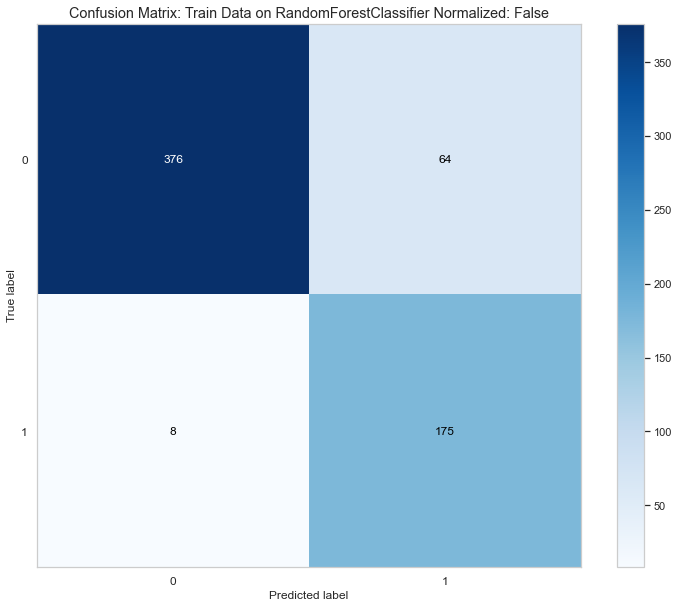

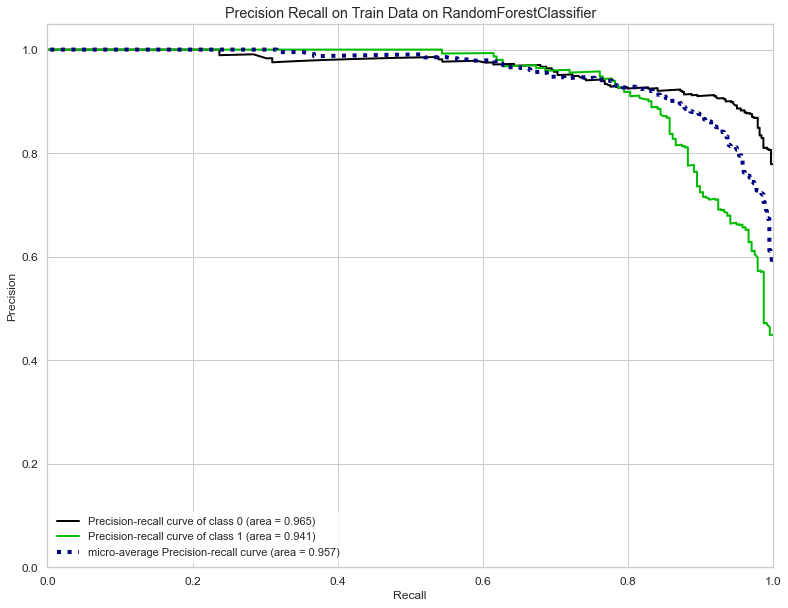

/Users/ericcacciavillani/anaconda3/envs/eflow/lib/python3.8/site-packages/scikitplot/metrics.py:443: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr_dict[i], tpr_dict[i])


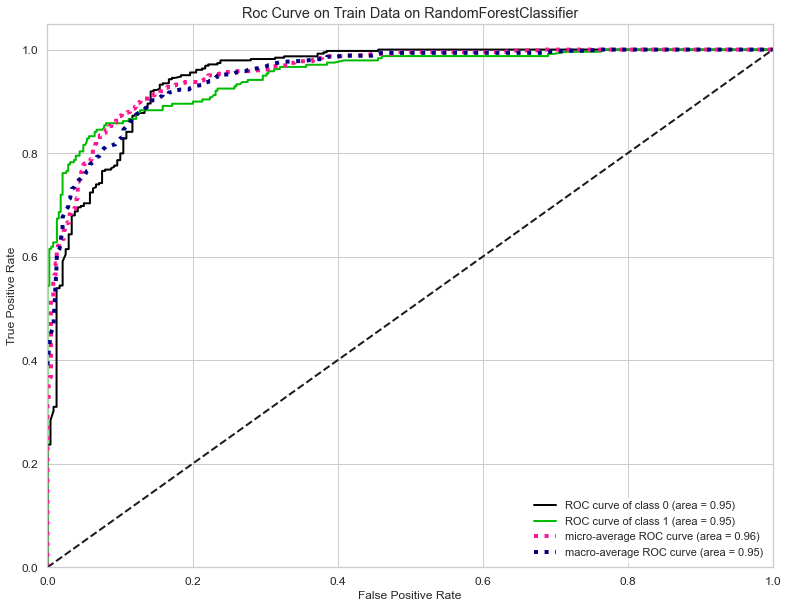

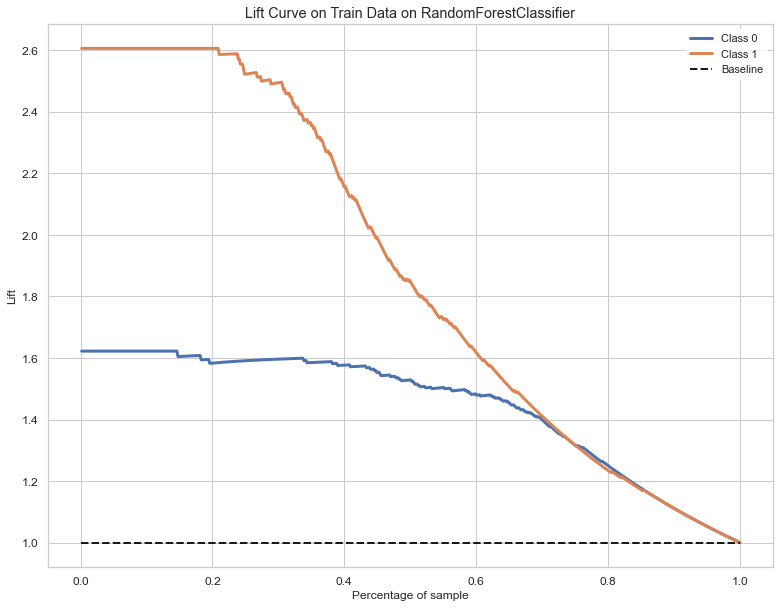

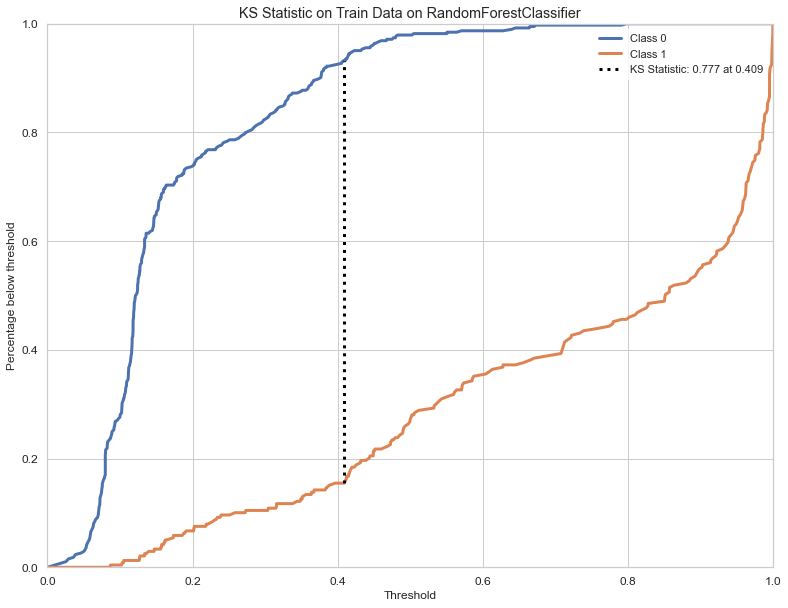

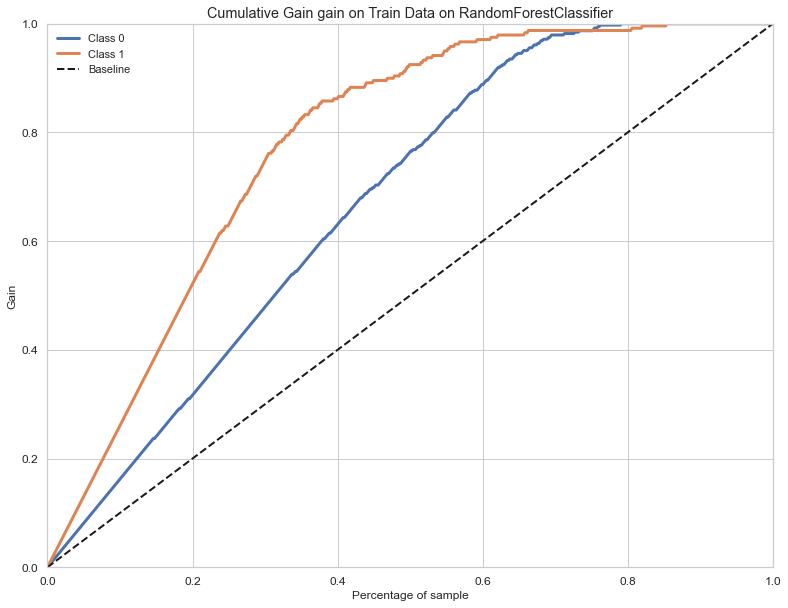



**********Generating graphs for when the model predicted incorrectly**********



../eflow/model_analysis/classification_analysis.py:1428: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tmp_df = copy.deepcopy(error_df[error_df[
../eflow/model_analysis/classification_analysis.py:1428: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tmp_df = copy.deepcopy(error_df[error_df[




**********Generating graphs for when the model predicted correctly**********

----------------------------------------------------------------------





Now running classification on Predict function

Shape of the data is (623, 12)


,Metric Scores
Precision(micro),0.8844
Precision(macro),0.9054
Precision(weighted),0.8936
MCC,0.7595
Recall(micro),0.8844
Recall(macro),0.8557
Recall(weighted),0.8844
F1-Score(micro),0.8844
F1-Score(macro),0.8710
F1-Score(weighted),0.8807


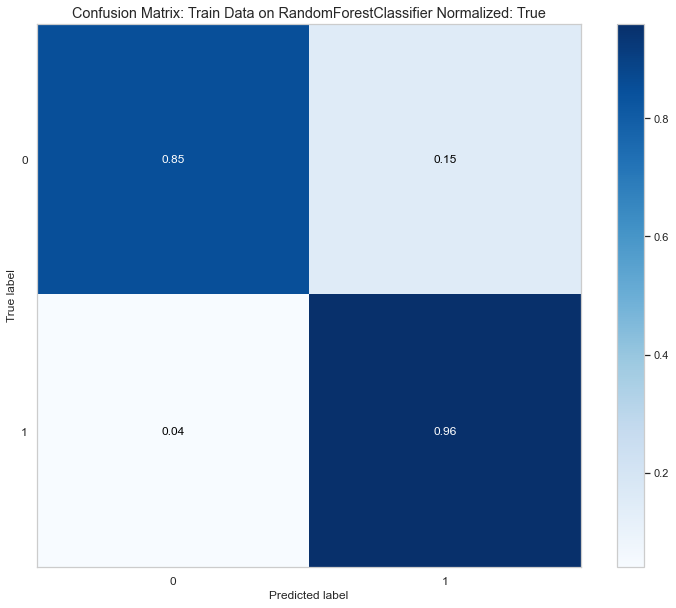

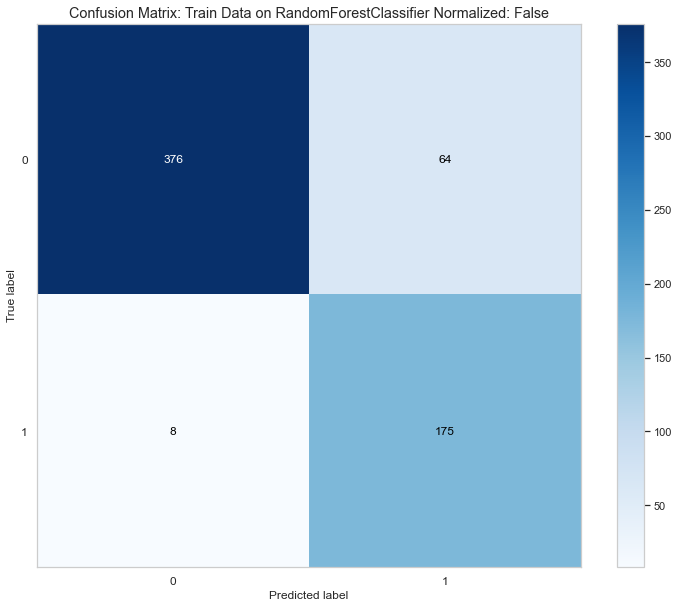



**********Generating graphs for when the model predicted incorrectly**********



../eflow/model_analysis/classification_analysis.py:1428: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tmp_df = copy.deepcopy(error_df[error_df[
../eflow/model_analysis/classification_analysis.py:1428: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tmp_df = copy.deepcopy(error_df[error_df[




**********Generating graphs for when the model predicted correctly**********

----------------------------------------------------------------------



In [24]:
model_analysis.perform_analysis(X=X_train,
                                y=y_train,
                                dataset_name="Train Data",
                                thresholds_matrix=[[.12,.04,]],
                                classification_error_analysis=True,
                                classification_correct_analysis=True)

In [25]:
for pred_name in model_analysis.get_predictions_names():
    print(f"Prediction name: {pred_name}")

    for threshold_dir in get_all_directories_from_path(model_analysis.folder_path + f"Train Data/{pred_name}/"):
        prediction_path = model_analysis.folder_path + f"Train Data/{pred_name}/"
        if "Thresholds" in threshold_dir:
            prediction_path += f"{threshold_dir}/"
            
        for answered_dir in get_all_directories_from_path(prediction_path):
            for sub_dir in get_all_directories_from_path(prediction_path + f"{answered_dir}/"):
                print(prediction_path + f"{answered_dir}/{sub_dir}/")
                infile = open(prediction_path + f"{answered_dir}/{sub_dir}/Train Data/_Extras/Statistics/Stat methods of features dataframes.pkl",'rb')
                stat_methods_dict = pickle.load(infile)
                infile.close()

                for stats_method in stat_methods_dict.keys():
                    print(stats_method)
                    display(stat_methods_dict[stats_method].round(6))
                    all_feature_relationship = set()
                    for feature_relationship in stat_methods_dict[stats_method][:10].index.to_list():
                        for feature in feature_relationship.split(" compared to "):
                            all_feature_relationship.add(feature)
                    print(all_feature_relationship)
                    print("-----" * 12 + "\n\n")

                del stat_methods_dict

Prediction name: Probabilities function
/Users/ericcacciavillani/Desktop/Coding/Python_Files/Artificial_Intelligence/Data Mining/eFlow/testing/eflow Data/Titanic Data/Classification Analysis/Target Feature: Survived/RandomForestClassifier/Train Data/Probabilities function/No Thresholds/Incorrectly Predicted Data/Predicted:1 Actual: 0/
Kolmogorov-Smirnov statistic


/Users/ericcacciavillani/anaconda3/envs/eflow/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


""


set()
------------------------------------------------------------


/Users/ericcacciavillani/Desktop/Coding/Python_Files/Artificial_Intelligence/Data Mining/eFlow/testing/eflow Data/Titanic Data/Classification Analysis/Target Feature: Survived/RandomForestClassifier/Train Data/Probabilities function/No Thresholds/Incorrectly Predicted Data/Predicted:0 Actual: 1/
Kolmogorov-Smirnov statistic


""


set()
------------------------------------------------------------


/Users/ericcacciavillani/Desktop/Coding/Python_Files/Artificial_Intelligence/Data Mining/eFlow/testing/eflow Data/Titanic Data/Classification Analysis/Target Feature: Survived/RandomForestClassifier/Train Data/Probabilities function/No Thresholds/Incorrectly Predicted Data/All Incorrect Data/
Kolmogorov-Smirnov statistic


,mean,std,var
Survived compared to Sex,0.302078,0.523007,0.273537
Survived compared to Fare,0.469241,0.462339,0.213758
Survived compared to Pclass,0.587789,0.363092,0.131836
Survived compared to Embarked,0.751588,0.225077,0.050660
Survived compared to Age,0.796045,0.187768,0.035257
Survived compared to SibSp,0.994749,0.006346,0.000040
Survived compared to Parch,1.000000,0.000000,0.000000


{'Fare', 'SibSp', 'Parch', 'Pclass', 'Embarked', 'Survived', 'Age', 'Sex'}
------------------------------------------------------------


/Users/ericcacciavillani/Desktop/Coding/Python_Files/Artificial_Intelligence/Data Mining/eFlow/testing/eflow Data/Titanic Data/Classification Analysis/Target Feature: Survived/RandomForestClassifier/Train Data/Probabilities function/No Thresholds/Correctly Predicted Data/All Correct Data/
Kolmogorov-Smirnov statistic


,mean,std,var
Survived compared to Sex,0.000000,0.000000,0.000000
Survived compared to Pclass,0.000216,0.000373,0.000000
Survived compared to Fare,0.000865,0.001499,0.000002
Survived compared to Parch,0.126298,0.202363,0.040951
Survived compared to Embarked,0.144393,0.227022,0.051539
Survived compared to SibSp,0.254694,0.347151,0.120514
Survived compared to Age,0.273080,0.361893,0.130967


{'Fare', 'SibSp', 'Parch', 'Pclass', 'Survived', 'Embarked', 'Age', 'Sex'}
------------------------------------------------------------


/Users/ericcacciavillani/Desktop/Coding/Python_Files/Artificial_Intelligence/Data Mining/eFlow/testing/eflow Data/Titanic Data/Classification Analysis/Target Feature: Survived/RandomForestClassifier/Train Data/Probabilities function/Thresholds/Incorrectly Predicted Data/Predicted:1 Actual: 0/
Kolmogorov-Smirnov statistic


""


set()
------------------------------------------------------------


/Users/ericcacciavillani/Desktop/Coding/Python_Files/Artificial_Intelligence/Data Mining/eFlow/testing/eflow Data/Titanic Data/Classification Analysis/Target Feature: Survived/RandomForestClassifier/Train Data/Probabilities function/Thresholds/Incorrectly Predicted Data/Predicted:0 Actual: 1/
Kolmogorov-Smirnov statistic


""


set()
------------------------------------------------------------


/Users/ericcacciavillani/Desktop/Coding/Python_Files/Artificial_Intelligence/Data Mining/eFlow/testing/eflow Data/Titanic Data/Classification Analysis/Target Feature: Survived/RandomForestClassifier/Train Data/Probabilities function/Thresholds/Incorrectly Predicted Data/All Incorrect Data/
Kolmogorov-Smirnov statistic


,mean,std,var
Survived compared to Sex,0.114100,0.197600,0.039046
Survived compared to Fare,0.532292,0.418253,0.174935
Survived compared to Pclass,0.684103,0.300830,0.090499
Survived compared to Age,0.804638,0.202248,0.040904
Survived compared to SibSp,0.914920,0.100889,0.010179
Survived compared to Embarked,0.995170,0.007494,0.000056
Survived compared to Parch,0.999975,0.000043,0.000000


{'Fare', 'SibSp', 'Parch', 'Pclass', 'Age', 'Survived', 'Embarked', 'Sex'}
------------------------------------------------------------


/Users/ericcacciavillani/Desktop/Coding/Python_Files/Artificial_Intelligence/Data Mining/eFlow/testing/eflow Data/Titanic Data/Classification Analysis/Target Feature: Survived/RandomForestClassifier/Train Data/Probabilities function/Thresholds/Correctly Predicted Data/All Correct Data/
Kolmogorov-Smirnov statistic


,mean,std,var
Survived compared to Sex,0.000000,0.000000,0.000000
Survived compared to Pclass,0.000285,0.000494,0.000000
Survived compared to Fare,0.000503,0.000871,0.000001
Survived compared to Parch,0.127622,0.196446,0.038591
Survived compared to SibSp,0.177817,0.256461,0.065772
Survived compared to Embarked,0.185475,0.264878,0.070160
Survived compared to Age,0.311140,0.367907,0.135355


{'Fare', 'SibSp', 'Parch', 'Pclass', 'Survived', 'Embarked', 'Age', 'Sex'}
------------------------------------------------------------


Prediction name: Predict function
/Users/ericcacciavillani/Desktop/Coding/Python_Files/Artificial_Intelligence/Data Mining/eFlow/testing/eflow Data/Titanic Data/Classification Analysis/Target Feature: Survived/RandomForestClassifier/Train Data/Predict function/Incorrectly Predicted Data/Predicted:1 Actual: 0/
Kolmogorov-Smirnov statistic


""


set()
------------------------------------------------------------


/Users/ericcacciavillani/Desktop/Coding/Python_Files/Artificial_Intelligence/Data Mining/eFlow/testing/eflow Data/Titanic Data/Classification Analysis/Target Feature: Survived/RandomForestClassifier/Train Data/Predict function/Incorrectly Predicted Data/Predicted:0 Actual: 1/
Kolmogorov-Smirnov statistic


""


set()
------------------------------------------------------------


/Users/ericcacciavillani/Desktop/Coding/Python_Files/Artificial_Intelligence/Data Mining/eFlow/testing/eflow Data/Titanic Data/Classification Analysis/Target Feature: Survived/RandomForestClassifier/Train Data/Predict function/Incorrectly Predicted Data/All Incorrect Data/
Kolmogorov-Smirnov statistic


,mean,std,var
Survived compared to Sex,0.302078,0.523007,0.273537
Survived compared to Fare,0.469241,0.462339,0.213758
Survived compared to Pclass,0.587789,0.363092,0.131836
Survived compared to Embarked,0.751588,0.225077,0.050660
Survived compared to Age,0.796045,0.187768,0.035257
Survived compared to SibSp,0.994749,0.006346,0.000040
Survived compared to Parch,1.000000,0.000000,0.000000


{'Fare', 'SibSp', 'Parch', 'Pclass', 'Embarked', 'Survived', 'Age', 'Sex'}
------------------------------------------------------------


/Users/ericcacciavillani/Desktop/Coding/Python_Files/Artificial_Intelligence/Data Mining/eFlow/testing/eflow Data/Titanic Data/Classification Analysis/Target Feature: Survived/RandomForestClassifier/Train Data/Predict function/Correctly Predicted Data/All Correct Data/
Kolmogorov-Smirnov statistic


,mean,std,var
Survived compared to Sex,0.000000,0.000000,0.000000
Survived compared to Pclass,0.000216,0.000373,0.000000
Survived compared to Fare,0.000865,0.001499,0.000002
Survived compared to Parch,0.126298,0.202363,0.040951
Survived compared to Embarked,0.144393,0.227022,0.051539
Survived compared to SibSp,0.254694,0.347151,0.120514
Survived compared to Age,0.273080,0.361893,0.130967


{'Fare', 'SibSp', 'Parch', 'Pclass', 'Survived', 'Embarked', 'Age', 'Sex'}
------------------------------------------------------------


/Users/ericcacciavillani/Desktop/Coding/Python_Files/Artificial_Intelligence/Data Mining/eFlow/testing/eflow Data/Titanic Data/Classification Analysis/Target Feature: Survived/RandomForestClassifier/Train Data/Predict function/Incorrectly Predicted Data/Predicted:1 Actual: 0/
Kolmogorov-Smirnov statistic


""


set()
------------------------------------------------------------


/Users/ericcacciavillani/Desktop/Coding/Python_Files/Artificial_Intelligence/Data Mining/eFlow/testing/eflow Data/Titanic Data/Classification Analysis/Target Feature: Survived/RandomForestClassifier/Train Data/Predict function/Incorrectly Predicted Data/Predicted:0 Actual: 1/
Kolmogorov-Smirnov statistic


""


set()
------------------------------------------------------------


/Users/ericcacciavillani/Desktop/Coding/Python_Files/Artificial_Intelligence/Data Mining/eFlow/testing/eflow Data/Titanic Data/Classification Analysis/Target Feature: Survived/RandomForestClassifier/Train Data/Predict function/Incorrectly Predicted Data/All Incorrect Data/
Kolmogorov-Smirnov statistic


,mean,std,var
Survived compared to Sex,0.302078,0.523007,0.273537
Survived compared to Fare,0.469241,0.462339,0.213758
Survived compared to Pclass,0.587789,0.363092,0.131836
Survived compared to Embarked,0.751588,0.225077,0.050660
Survived compared to Age,0.796045,0.187768,0.035257
Survived compared to SibSp,0.994749,0.006346,0.000040
Survived compared to Parch,1.000000,0.000000,0.000000


{'Fare', 'SibSp', 'Parch', 'Pclass', 'Embarked', 'Survived', 'Age', 'Sex'}
------------------------------------------------------------


/Users/ericcacciavillani/Desktop/Coding/Python_Files/Artificial_Intelligence/Data Mining/eFlow/testing/eflow Data/Titanic Data/Classification Analysis/Target Feature: Survived/RandomForestClassifier/Train Data/Predict function/Correctly Predicted Data/All Correct Data/
Kolmogorov-Smirnov statistic


,mean,std,var
Survived compared to Sex,0.000000,0.000000,0.000000
Survived compared to Pclass,0.000216,0.000373,0.000000
Survived compared to Fare,0.000865,0.001499,0.000002
Survived compared to Parch,0.126298,0.202363,0.040951
Survived compared to Embarked,0.144393,0.227022,0.051539
Survived compared to SibSp,0.254694,0.347151,0.120514
Survived compared to Age,0.273080,0.361893,0.130967


{'Fare', 'SibSp', 'Parch', 'Pclass', 'Survived', 'Embarked', 'Age', 'Sex'}
------------------------------------------------------------




/Users/ericcacciavillani/anaconda3/envs/eflow/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)




------------------------------Test Data------------------------------
Now running classification on Probabilities function on thresholds:
	Target Value:0: Prediction weight: 0.0
	Target Value:1: Prediction weight: 0.0

Shape of the data is (268, 12)


,Metric Scores
Precision(micro),0.8433
Precision(macro),0.8627
Precision(weighted),0.8525
MCC,0.6694
Recall(micro),0.8433
Recall(macro),0.8089
Recall(weighted),0.8433
F1-Score(micro),0.8433
F1-Score(macro),0.8234
F1-Score(weighted),0.8371


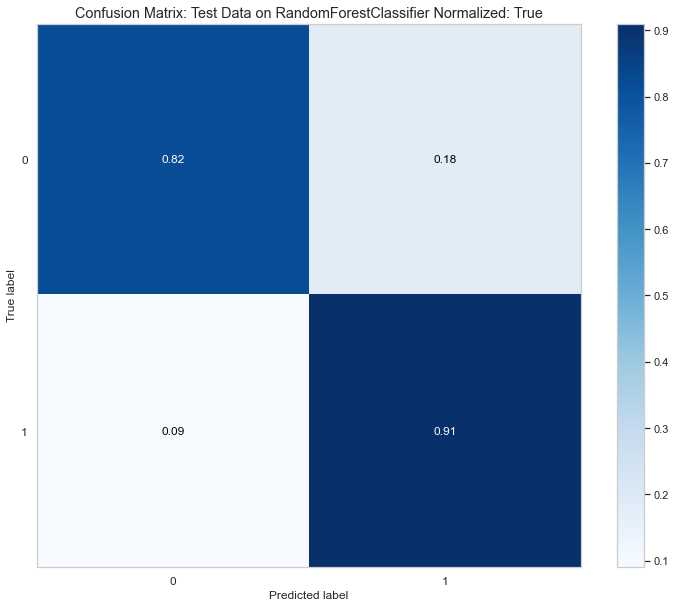

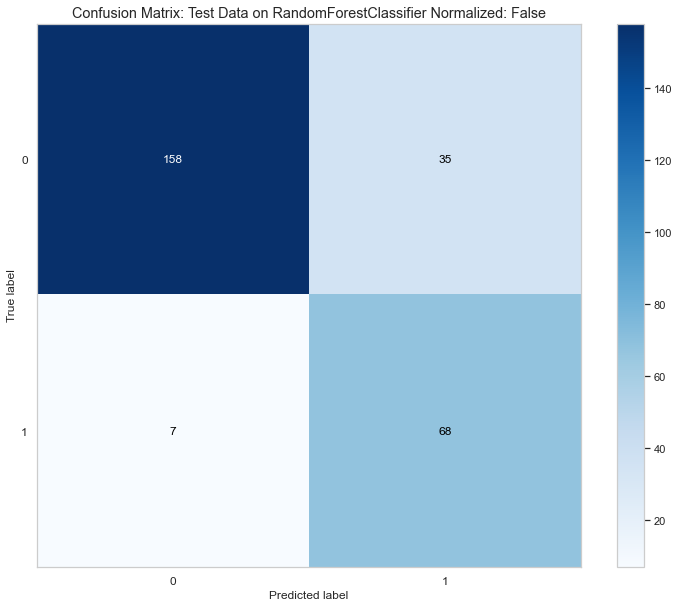

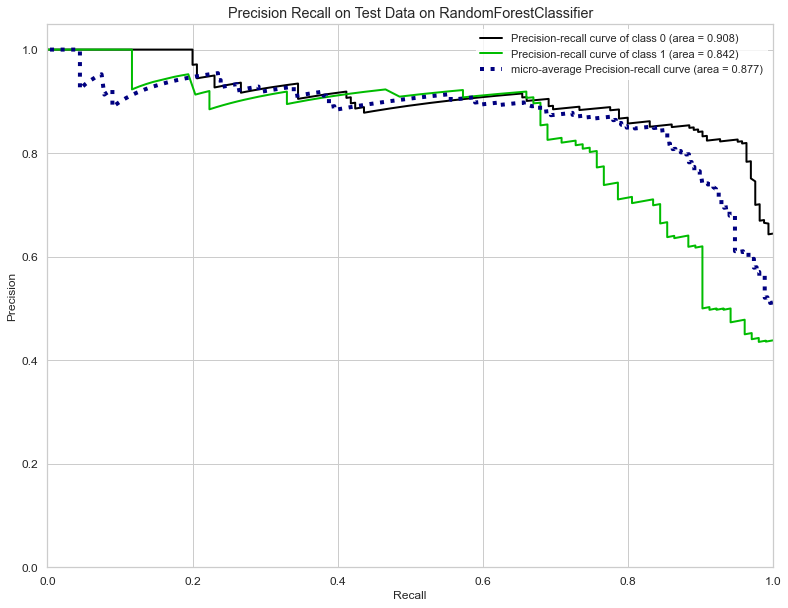

/Users/ericcacciavillani/anaconda3/envs/eflow/lib/python3.8/site-packages/scikitplot/metrics.py:443: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr_dict[i], tpr_dict[i])


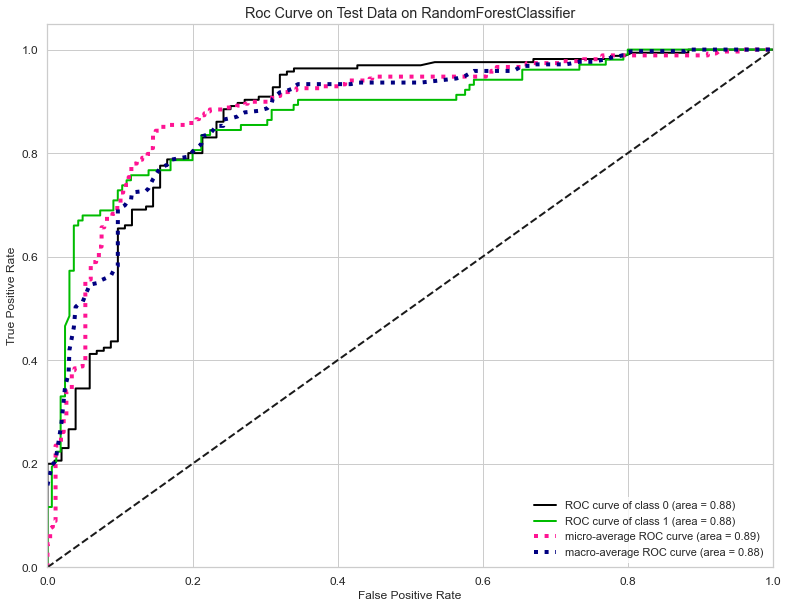

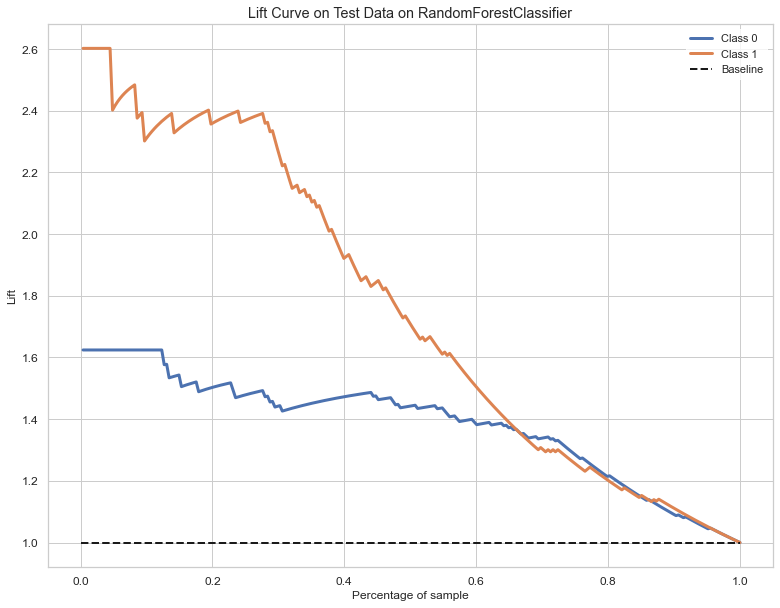

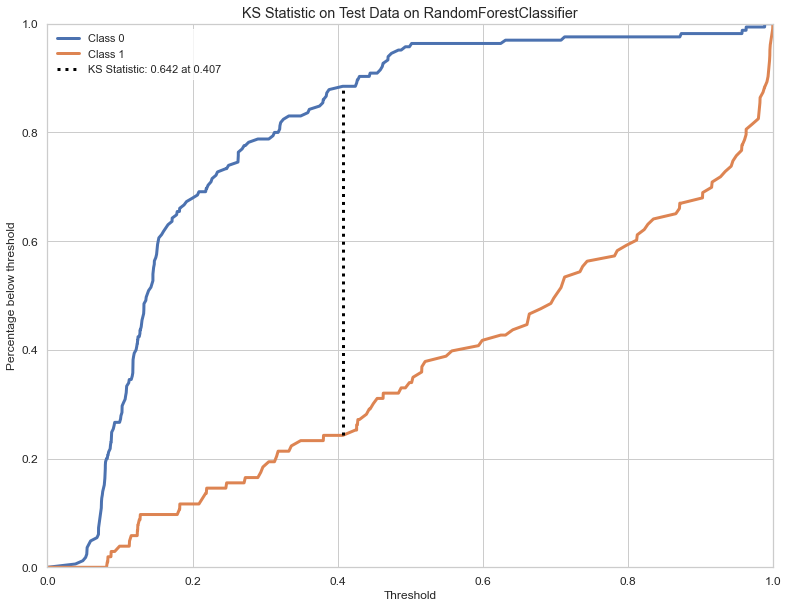

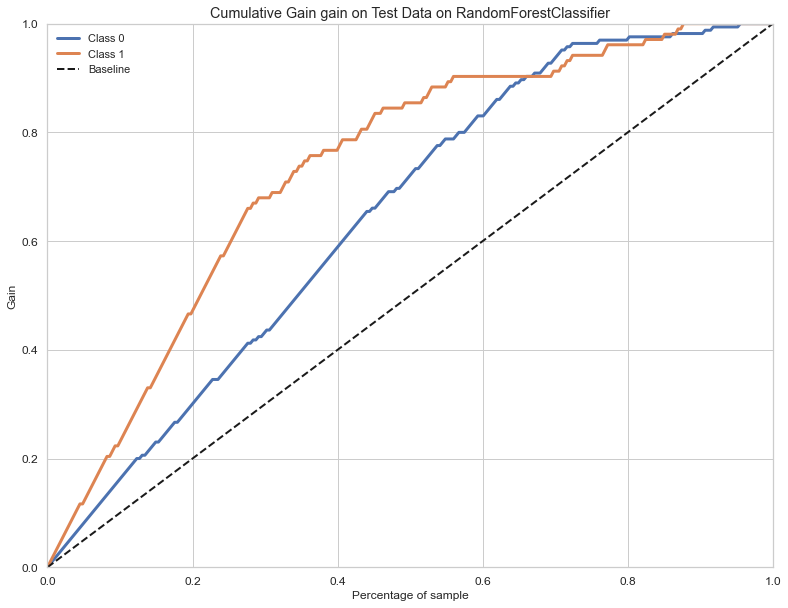



**********Generating graphs for when the model predicted incorrectly**********



../eflow/model_analysis/classification_analysis.py:1428: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tmp_df = copy.deepcopy(error_df[error_df[
../eflow/model_analysis/classification_analysis.py:1428: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tmp_df = copy.deepcopy(error_df[error_df[




**********Generating graphs for when the model predicted correctly**********

---------------------------------------------------------------------

Now running classification on Probabilities function on thresholds:
	Target Value:0: Prediction weight: 0.12
	Target Value:1: Prediction weight: 0.04

Shape of the data is (268, 12)


,Metric Scores
Precision(micro),0.8284
Precision(macro),0.8302
Precision(weighted),0.8290
MCC,0.6318
Recall(micro),0.8284
Recall(macro),0.8022
Recall(weighted),0.8284
F1-Score(micro),0.8284
F1-Score(macro),0.8116
F1-Score(weighted),0.8246


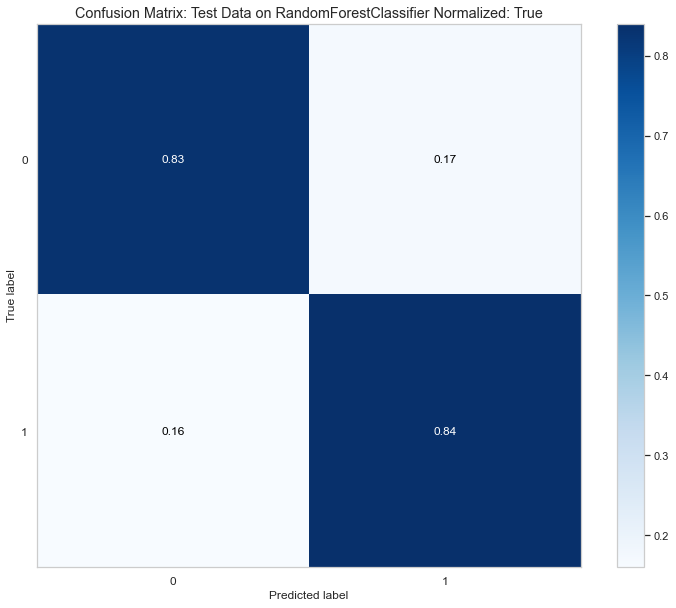

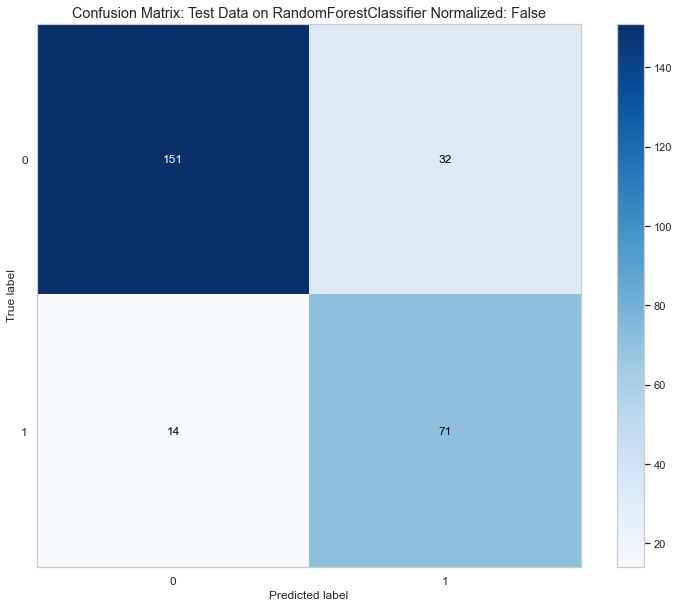

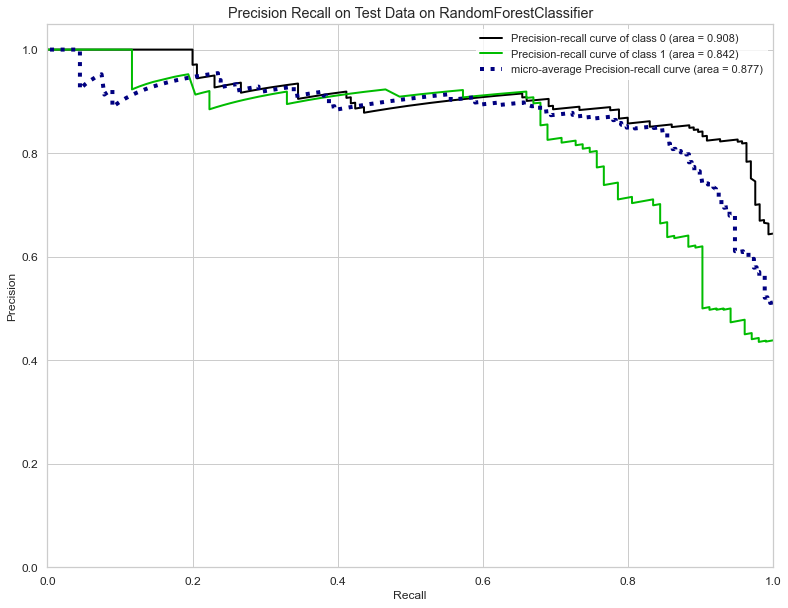

/Users/ericcacciavillani/anaconda3/envs/eflow/lib/python3.8/site-packages/scikitplot/metrics.py:443: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr_dict[i], tpr_dict[i])


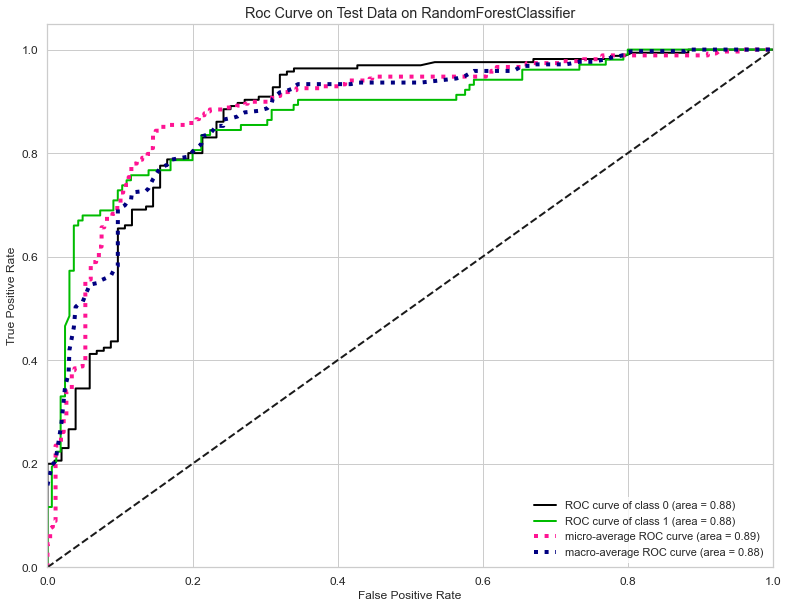

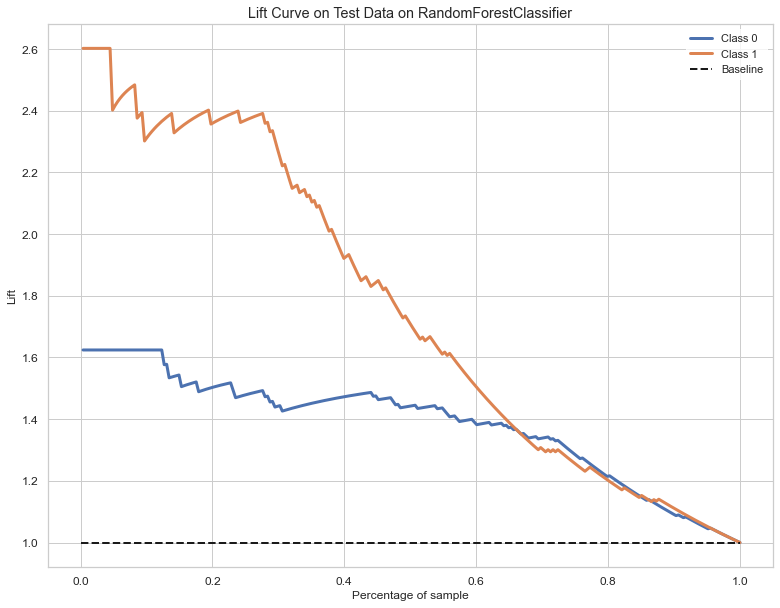

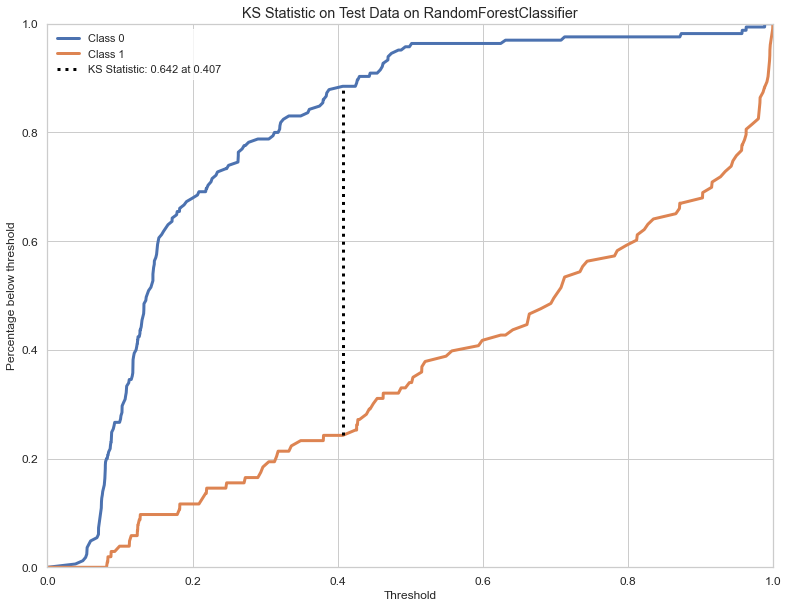

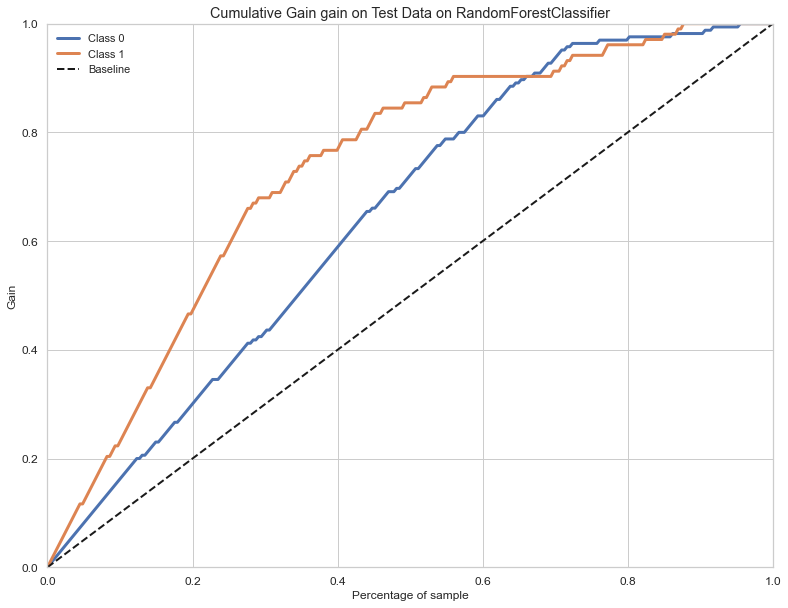



**********Generating graphs for when the model predicted incorrectly**********



../eflow/model_analysis/classification_analysis.py:1428: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tmp_df = copy.deepcopy(error_df[error_df[
../eflow/model_analysis/classification_analysis.py:1428: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tmp_df = copy.deepcopy(error_df[error_df[




**********Generating graphs for when the model predicted correctly**********

---------------------------------------------------------------------

Now running classification on Probabilities function on no thresholds.

Shape of the data is (268, 12)


,Metric Scores
Precision(micro),0.8433
Precision(macro),0.8627
Precision(weighted),0.8525
MCC,0.6694
Recall(micro),0.8433
Recall(macro),0.8089
Recall(weighted),0.8433
F1-Score(micro),0.8433
F1-Score(macro),0.8234
F1-Score(weighted),0.8371


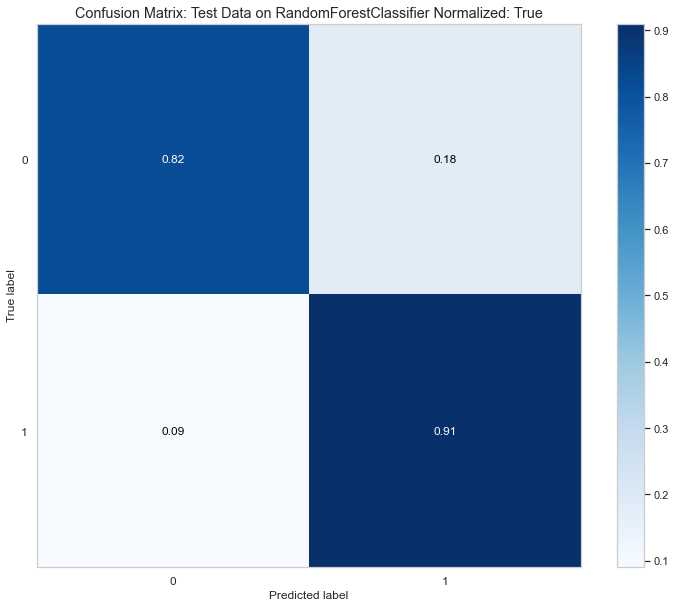

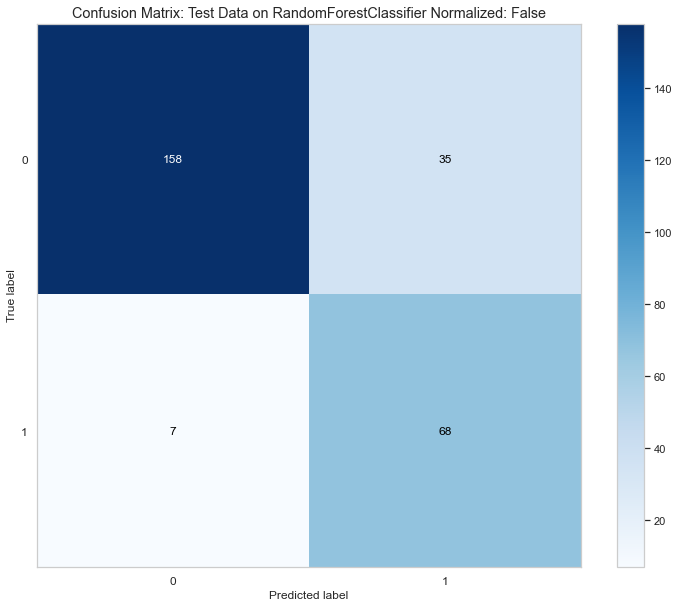

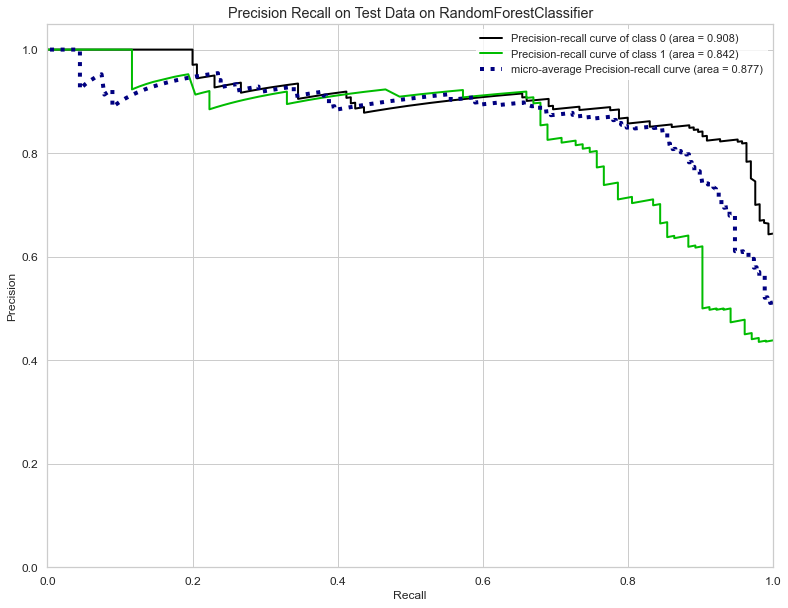

/Users/ericcacciavillani/anaconda3/envs/eflow/lib/python3.8/site-packages/scikitplot/metrics.py:443: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr_dict[i], tpr_dict[i])


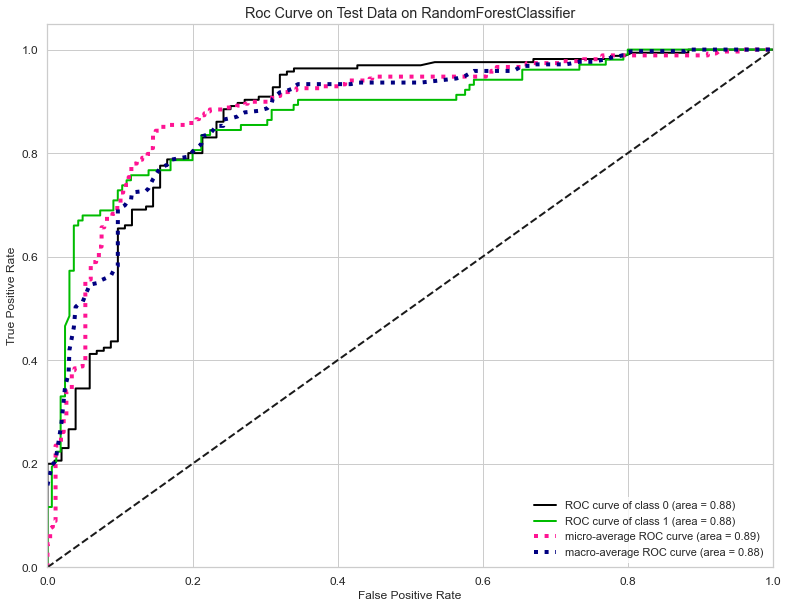

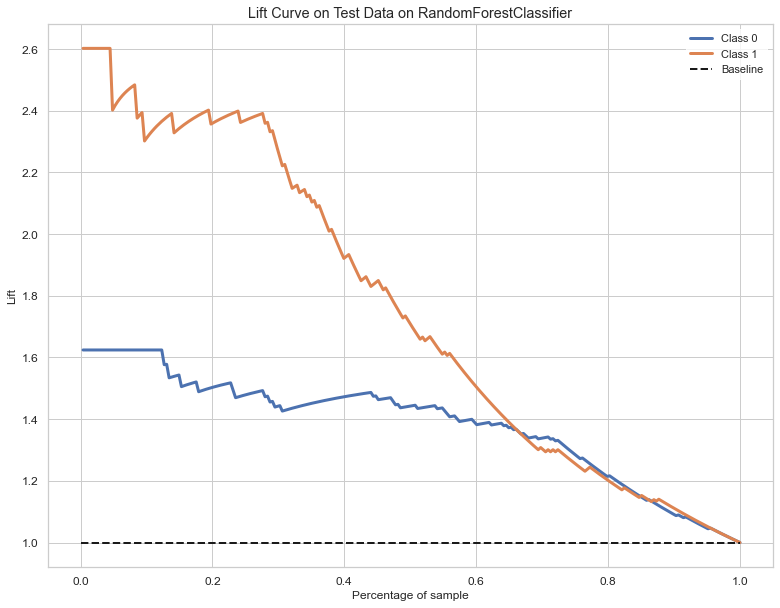

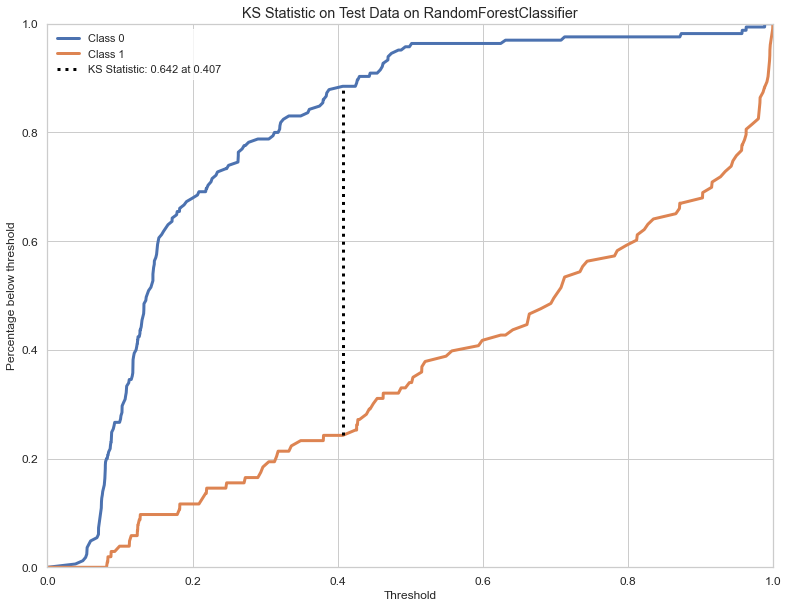

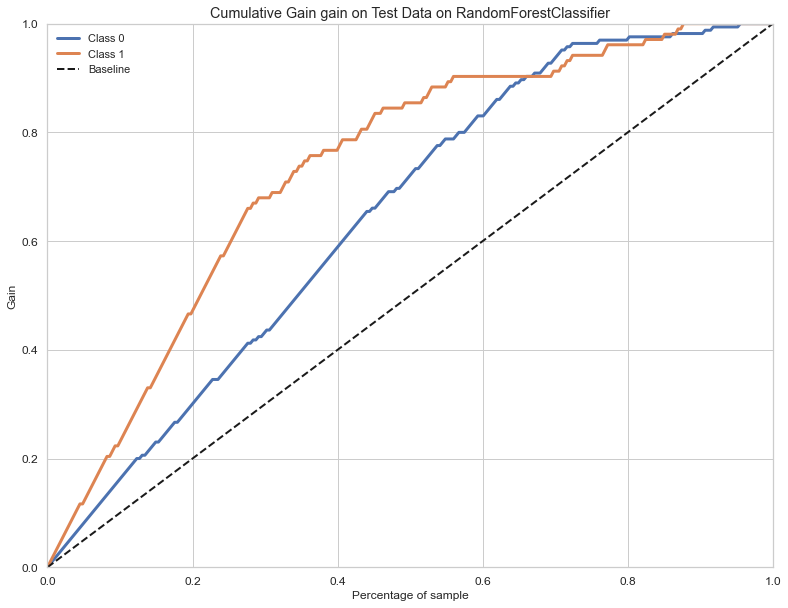



**********Generating graphs for when the model predicted incorrectly**********



../eflow/model_analysis/classification_analysis.py:1428: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tmp_df = copy.deepcopy(error_df[error_df[
../eflow/model_analysis/classification_analysis.py:1428: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tmp_df = copy.deepcopy(error_df[error_df[




**********Generating graphs for when the model predicted correctly**********

---------------------------------------------------------------------





Now running classification on Predict function

Shape of the data is (268, 12)


,Metric Scores
Precision(micro),0.8433
Precision(macro),0.8627
Precision(weighted),0.8525
MCC,0.6694
Recall(micro),0.8433
Recall(macro),0.8089
Recall(weighted),0.8433
F1-Score(micro),0.8433
F1-Score(macro),0.8234
F1-Score(weighted),0.8371


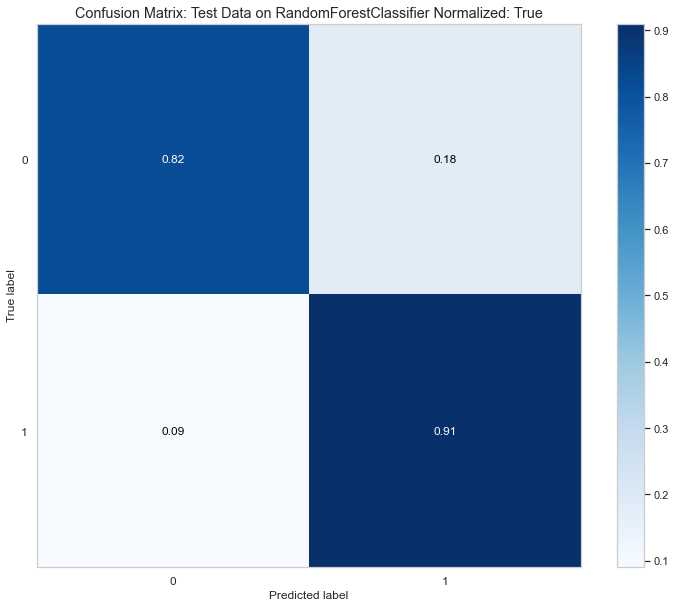

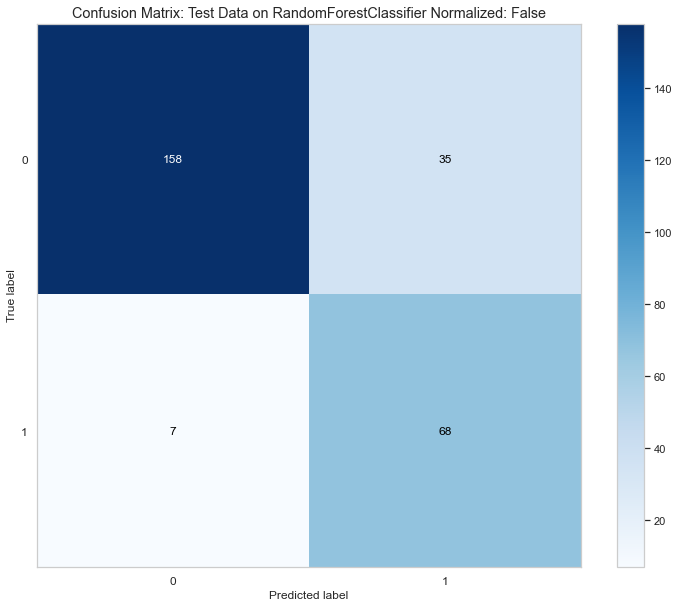



**********Generating graphs for when the model predicted incorrectly**********



In [ ]:
model_analysis.perform_analysis(X=X_test,
                                y=y_test,
                                dataset_name="Test Data",
                                thresholds_matrix=[[.0,.0],
                                                   [.12,.04]],
                                classification_error_analysis=True,
                                classification_correct_analysis=True)

In [ ]:
for pred_name in model_analysis.get_predictions_names():
    print(f"Prediction name: {pred_name}")

    for threshold_dir in get_all_directories_from_path(model_analysis.folder_path + f"Test Data/{pred_name}/"):
        prediction_path = model_analysis.folder_path + f"Test Data/{pred_name}/"
        if "Thresholds" in threshold_dir:
            prediction_path += f"{threshold_dir}/"
            
        for answered_dir in get_all_directories_from_path(prediction_path):
            for sub_dir in get_all_directories_from_path(prediction_path + f"{answered_dir}/"):
                infile = open(prediction_path + f"{answered_dir}/{sub_dir}/Test Data/_Extras/Statistics/Stat methods of features dataframes.pkl",'rb')
                stat_methods_dict = pickle.load(infile)
                infile.close()

                for stats_method in stat_methods_dict.keys():
                    print(stats_method)
                    display(stat_methods_dict[stats_method].round(6))
                    all_feature_relationship = set()
                    for feature_relationship in stat_methods_dict[stats_method][:10].index.to_list():
                        for feature in feature_relationship.split(" compared to "):
                            all_feature_relationship.add(feature)
                    print("-----" * 12 + "\n\n")

                del stat_methods_dict